<a href="https://colab.research.google.com/github/Ashwith25/Marketing-Campaign-for-Banking-Products/blob/master/Bank_Loan_Predictor_IS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marketing Campaign for Banking Products


The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.

Attribute Information:
- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer ($000)

- ZIP Code: Home Address ZIP code.
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month ($000)

- Education: Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional
- Mortgage: Value of house mortgage if any. ($000)
- Personal Loan: Did this customer accept the personal loan offered in the last
campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?

<strong>Objective:<br>
The classification goal is to predict the likelihood of a liability customer buying personal
loans.</strong>

<b> To deal with this problem, we will split the process into 9 steps for better understanding.


<a name="1"></a>
## 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values etc

We will be importing all the necessary libraries which will be required in our project.
- numpy, scipy and pandas for data analysis.
- matplotlib and seaborn for plotting graphs
- sklearn for training our model
- pickle for saving our best model

In [ ]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import io
import pickle
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from google.colab import files

%matplotlib inline

Now we will be importing out CSV file which have the necessary data. Let's have a quick look on the data.

In [ ]:
fl = files.upload()

In [ ]:
# content = pd.read_csv("/content/drive/My Drive/internship_studio_project.csv")
content = pd.read_csv(io.BytesIO(fl[list(fl.keys())[0]]))
content.head()

Now let's see if our data is completely/properly uploaded or not. This can be done either by looking at the shape or by looking at the end of the dataset.
Let's first see the end of the dataset.

In [ ]:
content.tail()

To check the shape of the dataset, <b>shape</b> variable is used.

In [ ]:
content.shape

It is necessary to initially check if all the data is proper or not. This we can do using <b>describe()</b>. This returns us all the necessary data such as mean, standard deviation, min, max, etc. 

In [ ]:
content.describe()

As we can see in the _Experience_ column, the <b>min</b> value is -3 which is not possible. This indicates that the cleaning of the data must be done. 

In a similar way as that of <b>describe()</b>, we can also see the datatypes and non-null value count by using an in-built function called <b>info()</b>. This will return the count of non-null values along with the datatype of thaat particular column.

In [ ]:
content.info()

This completes our 1st step. All the necessary libraries are imported. We saw what all are the attributes of our Columns, based upon which some decisons were also taken where cleaning of the data is to be done as the _Experience_ column had some wrong data. 



Now let's move onto our 2nd step.

<a name="2"></a>
## 2. Check if you need to clean the data for any of the variables

Firstly, let's first remove all the data which had faulty _Experience_.</br>
This we will be storing in a new variable.

In [ ]:
content.isnull().sum()

In [9]:
new_content = content.where(content["Experience"]>=0).dropna()

Now let's see if our data is ready to be used or not by using <b>describe()</b> as used earlier.

In [ ]:
new_content.describe()

Let's save the target feature in some other variable.

In [11]:
personal_loan = new_content["Personal Loan"]

As _ID_ will be different for each customer, it has nothing to with the customer taking the loan. So it is acting as noise in our dataset. Hence it will be better if removed. <br><br>
To check the significance of a column, we can check their correlation factor.

In [ ]:
for i in new_content.columns:
    print(f"Correlation between {i} and Personal Loan is",new_content[i].corr(personal_loan))

As we can see, _ID, Age, ZIP Code_ and _Experience_ are hardly even related to our target variable. _Income_ plays a important role in customer taking the personal loan. So we can drop the noisy columns (_ID, Age_ and _Experience_) to make our prediction for efficient.

In [ ]:
new_content.drop(["ID", "Age", "ZIP Code", "Experience"], axis=1, inplace=True)
new_content

This completes are 2nd step. Till now we have imported the necessary libraries and cleaned our data.<br><br>
Now let's move on to step 3 where we'll be studying our dataset.

<a name="3"></a>
## 3. EDA: Study the data distribution in each attribute and target variable, share your findings.<a name="abcd"></a>

Initially, we need to check what are the unique elements in each columns. This is possible using <b>unique()</b>, this returns a list of all the unique elements of that column.

In [ ]:
for i in new_content.columns:
    print(f"Unique elements of {i} are {new_content[i].nunique()}")

People with zero mortgage value are: 

In [ ]:
print("People with zero mortgage value are",len(new_content.where(new_content["Mortgage"]==0).dropna()))

Number of people with zero credit card spending per month are:

In [ ]:
print("People with zero credit card spending are",len(new_content.where(new_content["CCAvg"]==0).dropna()))

Value counts of all categorical columns are:

In [17]:
education = new_content["Education"].value_counts()
family = new_content["Family"].value_counts()
features = ["Securities Account", "CD Account", "Online", "CreditCard"]
yes_no = {0:"No", 1:"Yes"}
degree = {1: "Undergraduate", 2: "Graduate", 3:"Advanced/Professional"}

In [ ]:
print("Details of Customers opting for,")
for i in features:
    print("\n",i)
    y_n = new_content[i].value_counts()
    for j in y_n.index:
        print(f"{yes_no[j]}:\t {y_n.loc[j]}")
print("\nEducation levels of Customers are,")
for i in education.index:
    print(f"{degree[i]}: {education.loc[i]}")
print("\nFamily strength of customers are,")
for i in family.index:
    print(f"{int(i)}: {family.loc[i]}")

Plotting each feature can give us an idea on whether transformations are needed or not.

Correlation matrix would also help us identify the relationships between each and every features which we can compare with the above pairplot.

In [ ]:
fig, ax = plot.subplots(figsize = (15,10))
sns.heatmap(new_content.corr(), cmap="Greys", annot = True)

<b>Univariate Analysis are graphs plotted considering only one variable.</b>
</br>
Univariate analysis of all the columnbs/features bare given below.
<a name="boxplot"></a>
As, only _Income, CCAvg and Mortgage_ are the only fields who are highly ccorrelated with the target variable and the ones who might possibly have outliers. <a name="outlier"></a>Outliers are values which are either extremely high or extremely low as compared to values of InterQuartile Range (IQR). <br>
This can be verified byt plotting boxplots for each of these features using seaborn's <b>boxplot()</b> method.

In [ ]:
for i in ["Income", "CCAvg", "Mortgage"]:
    sns.boxplot(new_content[i])
    print("Skew value: ", new_content[i].skew())
    plot.title(i)
    plot.show()

The points marked with black dots represents <b>Outliers</b>. It is necessary to improve/remove them for better results. This we will be doing it in step 4.
<a name="countplot"></a>

In [ ]:
sns.countplot(new_content["Personal Loan"])

We can see that very few people have opted for the Personal Loan

Let's see what relationships do our feature variables have with our target.

In [ ]:
sns.scatterplot(new_content.Income, new_content["Personal Loan"])

In [ ]:
sns.barplot(new_content.Income, new_content["Personal Loan"])

By observing above two graphs, we can conclude that with increase in income, there are high chances that a customer would opt for Personal Loan.

<a name="pairplot"></a>
Let's now plot each feature against every other feature to get an idea about their relationship. This can be done using seaborn's <b>pairplot()</b>.

In [ ]:
sns.pairplot(new_content, hue="Personal Loan", markers=["+","D"])
plot.legend()

<a name="distplot"></a>
It is necessary to have our data as normalised as possible to increase the accuracy. Plotting them can help us identify them. For this, <b>distplot()</b> would be a good option.

In [ ]:
for i in ["Income", "CCAvg", "Mortgage"]:
    sns.distplot(new_content[i])
    plot.show()

Our datas are skewed to the right. Infact _Mortgage_ is highly skewed. Hence, we need to apply the necessary transformation.

<a name="4"></a>
## 4. Applying necessary transformations for the feature variables

As we saw above, our data had a lot of outliers. Let's remove them.

Outliers can be detected using multiple ways. Here we are making use of InterQuartile Range(IQR) to detect and remove the outliers. 

<a name="IQR"></a>
IQR is the range between the 75% of data(Q3) and 25% of data(Q1). 
We define outliers as any value higher than Q3 + (1.5 * IQR). Similar is the case with lower bound. Any value less than Q1 - (1.5 * IQR) is treated as outlier.

In [ ]:
lower = new_content["Income"].quantile(0.25)
upper = new_content["Income"].quantile(0.75)
IQR = upper-lower
upper_bound = upper + 1.5*IQR
lower_bound = lower - 1.5*IQR
print(lower_bound, upper_bound)

In [ ]:
lower1 = new_content["CCAvg"].quantile(0.25)
upper1 = new_content["CCAvg"].quantile(0.75)
IQR1 = upper1-lower1
upper_bound1 = upper1 + 1.5*IQR1
lower_bound1 = lower1 - 1.5*IQR1
print(lower_bound1, upper_bound1)

In [ ]:
sns.boxplot(new_content.Income)
plot.show()
sns.boxplot(new_content.CCAvg)

As we observed, that the outliers are beyond the upper bound for _Income and CCAvg_, we need to discard them.

In [29]:
df = new_content[new_content["Income"]<upper_bound]

In [30]:
df = df[df["CCAvg"]<upper_bound1]

<a name="outlier-removed"></a>
Now that we have removed the outliers, we can check if the outliers are reduced or not.

In [ ]:
sns.boxplot(df.Income)
plot.show()
sns.boxplot(df.CCAvg)

_Mortgage_ is highly skewes towards right, hence applying IQR would delete most of important data. Hence we will try to scale it down using Square Root Transformation to check whether the outliers are reduced or not.

We'll handle the _Mortgage_ a little later, first we'll resolve the _Income and CCAVG_ features.

<a name="report"></a>
Below is a small report which gives us the idea about how the transformations affect our dataset realtionships.

Income:

1. Initial correlation after removing faulty data: 0.5042
2. Correlation after removing outliers using IQR: 0.4889, skewness: 0.8474
3. Correlation when Power Transformed: 0.42, skewness: -0.0387
4. Correlation when SqRt Transformed: 0.4396, skewness: 0.2238

CCAvg:

1. Initial correlation after removing faulty data: 0.3693
2. Correlation after removing outliers using IQR: 0.3441, skewness: 0.8793
3. Correlation when Power Transformed: 0.2859, skewness: 0.0031
4. Correlation when SqRt Transformed: 0.0.2911, skewness: -0.0414

Power Transformation is specifically built to reduce the skewness. You might have gone through the small report, you can see how Power Transformation is reducing the skewness of both the features.

In [ ]:
pt = PowerTransformer(method="yeo-johnson", standardize = False, )
pt.fit(df["CCAvg"].values.reshape(-1,1))
temp = pt.transform(df["CCAvg"].values.reshape(-1,1))

sns.distplot(temp)
print(scipy.stats.skew(temp))
df["CCAvg"] = temp

In [ ]:
pt = PowerTransformer(method="box-cox", standardize = False)
pt.fit(df["Income"].values.reshape(-1,1))
temp = pt.transform(df["Income"].values.reshape(-1,1))

sns.distplot(temp)
print(scipy.stats.skew(temp))
df["Income"] = temp

We can see, skewness of <b>Income and CCAvg</b> have been reduced to a large extent.

Now let's check the updated correlation heatmap.

In [ ]:
fig, ax = plot.subplots(figsize = (15,10))
sns.heatmap(df.corr(), cmap="Greys", annot = True)

I have applied combinations with various other transformations.
To check the report, you may visit: https://docs.google.com/document/d/1FI8T-UV2ntleTMvPozZtByskbn93FM_-C8Cvh_ggQok/edit?usp=sharing

The below transformation is the best I have got from the analysis.

Transformation of _Mortgage_ is done by using Square Root Transformtion. The reason is, this transformation is handling the outliers pretty well.

To get in-detail report, you can check the document that I attached above.

In [35]:
# Mortgage with sqrt
df["Mortgage"] = np.sqrt(df["Mortgage"])

Boxplotting can help us visualise to check if our Transformation is doing good or not.

In [ ]:
sns.boxplot(df.Mortgage)

You can even apply binning here. Binning merges all the values of a particular range into a single value. Can say, it is a type of Label Encoding.

In [37]:
# mort_bin = pd.cut(df["Mortgage"], bins=[0, 100, 200, 300, 400, 500, 600, 700], labels=[0, 1, 2, 3, 4, 5, 6], include_lowest=True)

In [38]:
# df["Mortgage"] = pd.DataFrame(mort_bin)

One last time, let's again check if our dataset is ready to train or not.

In [ ]:
df.describe()

Our dataset is now far more better than what we initially had.

Next step is splitting our dataset for training and testing purpose.

<a name="5"></a>
## 5. Splitting the data into training and test set in the ratio of 70:30 respectively

Now it's time to drop our target variable from the dataset and store it in separate variable.

In [40]:
X = df.drop("Personal Loan", axis=1)
y = df["Personal Loan"]

If we remeber, the YES:NO ratio is really very very low. We can plot a countplot to recall that.

In [ ]:
sns.countplot(y)

So if we split it randomly, there might be chances that very less amount of "YES" would come under training.<br> To avoid this, we use stratified splitting.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size = 0.3)

random_states are integer value, which will remember our performance and splitting of our dataset. Inshort, It will preserve our model whenever we split it again.

We have splitted our dataset into training and testing set in 70 : 30 ratio.

<a name="6"></a>
## 6. Using the Logistic Regression model to predict the likelihood of a customer buying personal loans.

In [43]:
model = LogisticRegression(max_iter=1000)

Now that we have created the object of the Logistic Regression class, next we will fit our model.

In [44]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

We are now done with training our model.

Let's now check how our model performs to the test and train data.

In [45]:
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

The above 2 variables stores the predicted results. Now we can run various test to check the accuracy, precision, recall and f1-score.

In [46]:
recall_test_lr = metrics.recall_score(y_test, predictions_test)
precision_test_lr = metrics.precision_score(y_test, predictions_test)
f1_test_lr = metrics.f1_score(y_test, predictions_test)
acc_test_lr = metrics.accuracy_score(y_test, predictions_test)

recall_train_lr = metrics.recall_score(y_train, predictions_train)
precision_train_lr = metrics.precision_score(y_train, predictions_train)
f1_train_lr = metrics.f1_score(y_train, predictions_train)
acc_train_lr = metrics.accuracy_score(y_train, predictions_train)

We can make use of <b>pickle</b> library to save our model.

We can split the dataset multiple times, and check the accuracy score each time. Whenever our accuracy is more than the recorded best score. We will save the new model to the pickle file. 
<br>
So basically we are storing the model having highest accuracy.

In [47]:
# best_test_accuracy = 0
# best_train_accuracy = 0
# for iteration in range(50):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3)

#     model = LogisticRegression(max_iter=1000)
#     model.fit(X_train, y_train)
#     predictions_test = model.predict(X_test)
#     predictions_train = model.predict(X_train)
#     test_accuracy = metrics.accuracy_score(y_test, predictions_test)
#     train_accuracy = metrics.accuracy_score(y_train, predictions_train)

#     print("Accuracy test: ", test_accuracy)
#     print("Accuracy train: ", train_accuracy)

#     if test_accuracy > best_test_accuracy and train_accuracy > best_train_accuracy:
        
#         best_test_accuracy = test_accuracy
#         best_train_accuracy = train_accuracy
#         with open("bank_loan_model.pickle", "wb") as file:
#             pickle.dump(model, file)

Now to access the saved model, we can load that file to our model from now on i.e. we dont't need to train our model again anad again.

In [48]:
# model_file = open("bank_loan_model.pickle", "rb")
# model = pickle.load(model_file)

<a name="7"></a>
## 7. Metrics calculation for evaluating the model performance



Report for test data

In [ ]:
matrix_test = metrics.classification_report(y_test, predictions_test, labels=[0, 1], digits=5)
print("Report for test data:\n\n",matrix_test)

Report for train data

In [ ]:
matrix_train = metrics.classification_report(y_train, predictions_train, labels=[0, 1], digits=5)
print("Report for train data:\n\n",matrix_train)

Confusion matrix returns a matrix having the correct and incorrect predictions.

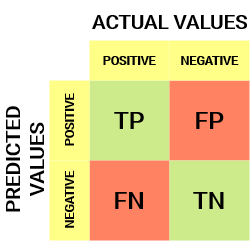

TP: True Positive<br>
FP: False Positive<br>
TN: True Negative<br>
FN: False Negative

It is better if False positives and False negatives are low.

In [ ]:
conf_matrix_test = metrics.confusion_matrix(y_test, predictions_test)
conf_matrix_test

In [ ]:
conf_matrix_train = metrics.confusion_matrix(y_train, predictions_train)
conf_matrix_train

<b>AUC ROC</b>  are another measure of calculating the efficiency of our model. In simple terms, it is the graph plotted with FPR on x-axis and TPR on y-axis.
<hr>
TPR: True positive rate<br>
FPR: False positive rate

<a name="auc-roc"></a>
AUC scores shows how likely our model can predict the values correctly. More the AUC value, better our model will perform.

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions_test)
auc_test_lr = metrics.auc(fpr, tpr)
auc_test_lr

In [ ]:
plot.plot(fpr, tpr)
plot.xlabel("False Positive Rate")
plot.ylabel("True Positive Rate")
plot.show()

Our graph seems pretty well 

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, predictions_train)
auc_train_lr = metrics.auc(fpr, tpr)
auc_train_lr

In [ ]:
plot.plot(fpr, tpr)
plot.xlabel("False Positive Rate")
plot.ylabel("True Positive Rate")
plot.show()

Even on Train data the performance is balanced.

This ends our evaluation on Logistic Regression. Now we'll check how our dataset performs with other classification algorithms.

<a name="8"></a>
## 8. Comparison with other Classification algorithms

<a name="dt"></a>
### Decision Tree

A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node holds a class label.



In [ ]:
model_dt = DecisionTreeClassifier(max_depth=10, criterion="entropy")
model_dt.fit(X_train, y_train)
predictions_test_dt = model_dt.predict(X_test)
predictions_train_dt = model_dt.predict(X_train)
model_dt_test_report = metrics.classification_report(y_test, predictions_test_dt, digits=5)
print("Report for Test Data:\n",model_dt_test_report)
model_dt_train_report = metrics.classification_report(y_train, predictions_train_dt, digits=5)
print("Report for Train Data:\n",model_dt_train_report)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions_test_dt)
auc_test_dt = metrics.auc(fpr, tpr)
fpr, tpr, thresholds = metrics.roc_curve(y_train, predictions_train_dt)
auc_train_dt = metrics.auc(fpr, tpr)

#Confusion Matrices
print("\nConfusion matrix for Testing Data:\n",metrics.confusion_matrix(y_test, predictions_test_dt))
print("\nConfusion matrix for Training Data:\n",metrics.confusion_matrix(y_train, predictions_train_dt))

#individual scores
recall_test_dt = metrics.recall_score(y_test, predictions_test_dt)
precision_test_dt = metrics.precision_score(y_test, predictions_test_dt)
f1_test_dt = metrics.f1_score(y_test, predictions_test_dt)
acc_test_dt = metrics.accuracy_score(y_test, predictions_test_dt)

recall_train_dt = metrics.recall_score(y_train, predictions_train_dt)
precision_train_dt = metrics.precision_score(y_train, predictions_train_dt)
f1_train_dt = metrics.f1_score(y_train, predictions_train_dt)
acc_train_dt = metrics.accuracy_score(y_train, predictions_train_dt)

<a name="rf"></a>
### Random Forest

Random forest is a method, where a dataset is split into multiple sets and each is then trained using Decision trees. At the end, the output having maximum occurence is considered. Basically, as many trees are iterating at a time, hence the name Random forest. It is based on maximum vote system.

In [ ]:
model_rf = RandomForestClassifier(n_estimators=10, max_depth=8, criterion="entropy")
model_rf.fit(X_train, y_train)
predictions_test_rf = model_rf.predict(X_test)
predictions_train_rf = model_rf.predict(X_train)
report_test_rf = metrics.classification_report(y_test, predictions_test_rf, digits=5)
print("Report for Test Data:\n",report_test_rf)
report_train_rf = metrics.classification_report(y_train, predictions_train_rf, digits=5)
print("Report for Train Data:\n",report_train_rf)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions_test_rf)
auc_test_rf = metrics.auc(fpr, tpr)
fpr, tpr, thresholds = metrics.roc_curve(y_train, predictions_train_rf)
auc_train_rf = metrics.auc(fpr, tpr)

#Confusion Matrices
print("\nConfusion matrix for Testing Data:\n",metrics.confusion_matrix(y_test, predictions_test_rf))
print("\nConfusion matrix for Traing Data:\n",metrics.confusion_matrix(y_train, predictions_train_rf))

#individual scores
recall_test_rf = metrics.recall_score(y_test, predictions_test_rf)
precision_test_rf = metrics.precision_score(y_test, predictions_test_rf)
f1_test_rf = metrics.f1_score(y_test, predictions_test_rf)
acc_test_rf = metrics.accuracy_score(y_test, predictions_test_rf)

recall_train_rf = metrics.recall_score(y_train, predictions_train_rf)
precision_train_rf = metrics.precision_score(y_train, predictions_train_rf)
f1_train_rf = metrics.f1_score(y_train, predictions_train_rf)
acc_train_rf = metrics.accuracy_score(y_train, predictions_train_rf)

<a name="nb"></a>
### Naive Bayes

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other

In [ ]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
predictions_test_nb = model_nb.predict(X_test)
predictions_train_nb = model_nb.predict(X_train)
report_test_nb = metrics.classification_report(y_test, predictions_test_nb, digits=5)
print("Report for Test Data:\n",report_test_nb)
report_train_nb = metrics.classification_report(y_train, predictions_train_nb, digits=5)
print("Report for Train Data:\n",report_train_nb)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions_test_nb)
auc_test_nb = metrics.auc(fpr, tpr)
fpr, tpr, thresholds = metrics.roc_curve(y_train, predictions_train_nb)
auc_train_nb = metrics.auc(fpr, tpr)

#Confusion Matrices
print("\nConfusion matrix for Testing Data:\n",metrics.confusion_matrix(y_test, predictions_test_nb))
print("\nConfusion matrix for Traing Data:\n",metrics.confusion_matrix(y_train, predictions_train_nb))

#individual scores
recall_test_nb = metrics.recall_score(y_test, predictions_test_nb)
precision_test_nb = metrics.precision_score(y_test, predictions_test_nb)
f1_test_nb = metrics.f1_score(y_test, predictions_test_nb)
acc_test_nb = metrics.accuracy_score(y_test, predictions_test_nb)

recall_train_nb = metrics.recall_score(y_train, predictions_train_nb)
precision_train_nb = metrics.precision_score(y_train, predictions_train_nb)
f1_train_nb = metrics.f1_score(y_train, predictions_train_nb)
acc_train_nb = metrics.accuracy_score(y_train, predictions_train_nb)

<a name="knn"></a>
### KNN

KNN is an acronym for K Nearest Neighbours. This algorithm divides the scattered into a specific class based on their properties. At the testing, it checks the properties of the neighbouring points and based on the probability of each class it will classify the point into the predicted class.

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
predictions_test_knn = model_knn.predict(X_test)
predictions_train_knn = model_knn.predict(X_train)
knn_test_report = metrics.classification_report(y_test, predictions_test_knn, digits = 5)
print("Report for Test Data:\n",knn_test_report)
knn_train_report = metrics.classification_report(y_train, predictions_train_knn, digits = 5)
print("Report for Train Data:\n",knn_train_report)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions_test_knn)
auc_test_knn = metrics.auc(fpr, tpr)
fpr, tpr, thresholds = metrics.roc_curve(y_train, predictions_train_knn)
auc_train_knn = metrics.auc(fpr, tpr)

#Confusion Matrices
print("\nConfusion matrix for Testing Data:\n",metrics.confusion_matrix(y_test, predictions_test_knn))
print("\nConfusion matrix for Traing Data:\n",metrics.confusion_matrix(y_train, predictions_train_knn))

#individual scores
recall_test_knn = metrics.recall_score(y_test, predictions_test_knn)
precision_test_knn = metrics.precision_score(y_test, predictions_test_knn)
f1_test_knn = metrics.f1_score(y_test, predictions_test_knn)
acc_test_knn = metrics.accuracy_score(y_test, predictions_test_knn)

recall_train_knn = metrics.recall_score(y_train, predictions_train_knn)
precision_train_knn = metrics.precision_score(y_train, predictions_train_knn)
f1_train_knn = metrics.f1_score(y_train, predictions_train_knn)
acc_train_knn = metrics.accuracy_score(y_train, predictions_train_knn)

### Report 

Now as we have tested our dataset with various other algorithms, let's summarize them now.

In [61]:
report_test = pd.DataFrame(
    {
        "Models":["Logistic Regression", "Decision Tree", "Random Forest", "Naive Bayes", "KNN"],
        "Accuracy":[acc_test_lr, acc_test_dt, acc_test_rf, acc_test_nb, acc_test_knn],
        "Recall":[recall_test_lr, recall_test_dt, recall_test_rf, recall_test_nb, recall_test_knn],
        "Precision":[precision_test_lr, precision_test_dt, precision_test_rf, precision_test_nb, precision_test_knn],
        "F1-score":[f1_test_lr, f1_test_dt, f1_test_rf, f1_test_nb, f1_test_knn],
        "AUC-ROC score":[auc_test_lr, auc_test_dt, auc_test_rf, auc_test_nb, auc_test_knn] 
    }
)

In [62]:
report_train = pd.DataFrame(
    {
        "Models":["Logistic Regression", "Decision Tree", "Random Forest", "Naive Bayes", "KNN"],
        "Accuracy":[acc_train_lr, acc_train_dt, acc_train_rf, acc_train_nb, acc_train_knn],
        "Recall":[recall_train_lr, recall_train_dt, recall_train_rf, recall_train_nb, recall_train_knn],
        "Precision":[precision_train_lr, precision_train_dt, precision_train_rf, precision_train_nb, precision_train_knn],
        "F1-score":[f1_train_lr, f1_train_dt, f1_train_rf, f1_train_nb, f1_train_knn],
        "AUC-ROC score":[auc_train_lr, auc_train_dt, auc_train_rf, auc_train_nb, auc_train_knn] 
    }
)

In [ ]:
print("Test Data report:\n\n")
report_test

In [ ]:
print("Train Data report:\n\n")
report_train

Hence, observing the above reports, we can conclude that our dataset works better with **Random forest** and **Decision tree** algorithm.

## Business understanding of our model

<h1>Table of Contents</h1>

- [Import](#import)
- [Cleaning](#cleaning)
- [EDA](#eda)
- [Transformations](#transformations)
- [Splitting](#splitting)
- [Training](#training)
- [Metrics Evaluation](#metrics-evaluation)
- [Comparisons](#comparisons)
  * [Decision Tree Classifier](#decision-tree-classifier)
  * [Random Forest Classifier](#random-forest-classifier)
  * [Naive Bayes](#naive-bayes)
  * [K Nearest Neighbours](#k-nearest-neighbours)
- [Conclusion](#conclusion)



[<h1>Import</h1>](#1)<a name="import"></a>

We have imported all the necessary required models for our project.<br>

[<h1>Cleaning</h1>](#2) <a name="cleaning"></a>

Looking into the raw dataset, we observed that there were some faulty data (i.e. values were below 0) in _Experience_ columns. Hence, as the data was incorrect, it is better to remove the entire rows from our dataset.<br>

_ID_ being different for each customer, it was better to drop that column also. Also, when we tested the correlations of feature variables with our Target variable, it was observed that _Age and Experience_ was not so related with Target variable. Aslo noticed one thing, _ZIP Code_ was also not of much use. So, in the end, we dropped 4 columns, which are
- _ID_
- _Age_
- _Experience_
- _ZIP Code_

[<h1>EDA</h1>](#3)<a name="eda"></a>

We did the Exploratory Data Analysis([EDA](#abcd)) to check how our data is distributed. Initially we checked the number of unique elements in each column. We observed, that _Income, CCAvg and Mortgage_ had a bunch of unique elements. Hence the chances of having the outliers in more in this case. It was also seen using [countplot](#countplot) that very few customers took the _Personal Loan_.
One more thing to notice was that, people with **0** _Mortgage_ were very high, which might highly skew our distribution to the right. Plotting various graphs helped us understand their distribution and their relationship with the target variable. We then plotted the correlation heatmap to see the relationships ofthe variables with each other. To check the presence of outliers, we plotted [**boxplot**](#boxplot) which marks the outliers of the column. All three variables(_Income, CCAvg and Mortgage_) were having outliers. Plotting [**distplot**](#distplot) helped us understand the skewness of the graph. The distributions were skewed to the right. It was seen, with increase in _Income_, there was increase in probabibility of the custmer buying the _Personal Loan_. [**Pairplotting**](#pairplot) displayed the graphs of variable against each other, all at once. <br>

[<h1>Transformations</h1>](#4)<a name="transformations"></a>

Now, we tried to remove the [outliers](#outlier) using [IQR method](#IQR).

> Outliers are values which are either very low or very large as compared to other values of that column. 

Many outliers were removed after applying the IQR method. [check here](#outlier-removed)
<br>
As the _Mortgage_ was highly skewed(even high number of "0"), applying IQR would probably treat many important values as the outlier. Hence, it is not recommended to use IQR in this case.

After removing the outliers, the skewness was not that reduced. We need too appy certain transformations to make our distribution Normal. I performed several test and formulated a report where we can see how features vary with different transformation.

---

1. Initial correlation after removing faulty data: 0.5042
2. Correlation after removing outliers using IQR: 0.4889, skewness: 0.8474
3. Correlation when Power Transformed: 0.42, skewness: -0.0387
4. Correlation when SqRt Transformed: 0.4396, skewness: 0.2238

CCAvg:

1. Initial correlation after removing faulty data: 0.3693
2. Correlation after removing outliers using IQR: 0.3441, skewness: 0.8793
3. Correlation when Power Transformed: 0.2859, skewness: 0.0031
4. Correlation when SqRt Transformed: 0.0.2911, skewness: -0.0414

---
We can see, Power Transformation is reducing the skewness to a great extent but we have too compromise on the correlation. Similarly, Square root transformation is also reducing the skewness(not much as that of Power Transformation) but is maintaining the correlation quite a bit more than the Power Tansformation. As _Mortgage_ is highly skewed, we can apply either binning or square root transformation. 
> Binning is the process where we label or cap the values in a particular range to a single value i.e. let's say, all values between 0 to 100 will be treated as 0 only. Similar to Label encoding.

I tried different combinations for transformations on different features and observed, _Income and CCAvg_ were performing good with Power transformation while Square root transformation went good with _Mortgage_ as it removed all the outliers.
To get an idea of the analysis, you can visit this [link](https://docs.google.com/document/d/1FI8T-UV2ntleTMvPozZtByskbn93FM_-C8Cvh_ggQok/edit?usp=sharing) where I attached the results.
To check if the dataset is clean, we again plotted the boxplots for each of these three features and it can be seen that there are NO OUTLIERS and OUR DISTRIBUTION IS ALSO NORMAL NOW.
<br>

[<h1>Splitting</h1>](#5) <a name="splitting"></a>

We then separated our target variable from the dataset and stored it seperately.

If you remember, there were very less people who opted for _Personal Loan_. So, if we split it randomly, there might be chances that our model will get trained oonly for "NO" values. To avoid this, we used stratified splitting. We used the sklearn's inbuilt test_train_method to split the data in 70:30 ratio. 
- 70% for training
- 30% for testing.

<br>

---

[<h1>Training</h1>](#6)<a name="training"></a>

Initially we tried to train our model using Logistic Regression. 
> Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. 

Once the training/fitting was done, we tested our model by passing the test set to check the accuracy and metrics evaluation.

We can even use pickle library to save our model and later directly load the model without training it again. 

[<h1>Metrics Evaluation</h1>](#7) <a name="metrics-evaluation"></a>

Before diving into the results, let's first see what these values mean


>True Positive (TP) : <br>
The predicted value matches the actual value
The actual value was positive and the model predicted a positive value.

>True Negative (TN):<br>
The predicted value matches the actual value
The actual value was negative and the model predicted a negative value.

>False Positive (FP) – Type 1 error:<br>
The predicted value was falsely predicted
The actual value was negative but the model predicted a positive value
Also known as the Type 1 error.

>False Negative (FN) – Type 2 error:<br>
The predicted value was falsely predicted
The actual value was positive but the model predicted a negative value
Also known as the Type 2 error.

---

> Precision tells us how many of the correctly predicted cases actually turned out to be positive. Precision is a useful metric in cases where False Positive is a higher concern than False Negatives.

> Recall tells us how many of the actual positive cases we were able to predict correctly with our model. Recall is a useful metric in cases where False Negative trumps False Positive.

> F1-score is a harmonic mean of Precision and Recall

> AUC ROC are another measure of calculating the efficiency of our model. In simple terms, it is the graph plotted with FPR on x-axis and TPR on y-axis.

---
Now let's see what results we got.

The results of testing are:

|              | precision | recall  | f1-score | support |
|--------------|-----------|---------|----------|---------|
| 0            | 0.97531   | 0.98982 | 0.98251  | 1277    |
| 1            | 0.84524   | 0.68932 | 0.75936  | 103     |
| accuracy     |           |         | 0.96739  | 1380    |
| macro avg    | 0.91027   | 0.83957 | 0.80793  | 1380    |
| weighted avg | 0.96560   | 0.96739 | 0.98586  | 1380    |

The results for training are:


|              | precision | recall  | f1-score | support |
|--------------|-----------|---------|----------|---------|
| 0            | 0.96815   | 0.99026 | 0.97908  | 2978    |
| 1            | 0.83237   | 0.59751 | 0.69565  | 241     |
| accuracy     |           |         | 0.96086  | 3219    |
| macro avg    | 0.90026   | 0.79389 | 0.83737  | 3219    |
| weighted avg | 0.95799   | 0.96086 | 0.95786  | 3219    |

Confusion matrix for testing data is:


| 1264 | 13 |
|-|-|
| 32   | 71 |

Auc scores:

For testing: 0.8395701393587823

For training: 0.793886147098083

We can the plot the [AUC-ROC curves](#auc-roc) for both the data. They seem pretty good.

[<h1>Comparisons</h1>](#8)<a name="comparisons"></a>

We even trained our model using various other algorithmns, the results are displayed below

---

<h3> Decision Tree Classifier </h3> <a name="decision-tree-classifier"></a>
> A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node holds a class label.

Results for testing:


|              | precision | recall  | f1-score | support |
|--------------|-----------|---------|----------|---------|
| 0            | 0.98671   | 0.98825 | 0.98748  | 1277    |
| 1            | 0.85149   | 0.83495 | 0.84314  | 103     |
| accuracy     |           |         | 0.97681  | 1380    |
| macro avg    | 0.91910   | 0.91160 | 0.91531  | 1380    |
| weighted avg | 0.97662   | 0.97681 | 0.97671  | 1380    |

Results for training:

|              | precision | recall  | f1-score | support |
|--------------|-----------|---------|----------|---------|
| 0            | 0.99632   | 0.99966 | 0.99799  | 2978    |
| 1            | 0.99567   | 0.95436 | 0.97458  | 241     |
| accuracy     |           |         | 0.99627  | 3219    |
| macro avg    | 0.99599   | 0.97701 | 0.98628  | 3219    |
| weighted avg | 0.99627   | 0.99627 | 0.99624  | 3219    |


Confusion matrix for Testing Data:

 
| 1262 | 15 |
|-|-|
| 17   | 86 |

---

<h3> Random Forest Classifier</h3> <a name="random-forest-classifier"></a>

> Random forest is a method, where a dataset is split into multiple sets and each is then trained using Decision trees. At the end, the output having maximum occurence is considered. Basically, as many trees are iterating at a time, hence the name Random forest. It is based on maximum vote system.

Results for testing

|              | precision | recall  | f1-score | support |
|--------------|-----------|---------|----------|---------|
| 0            | 0.97989   | 0.99217 | 0.98599  | 1277    |
| 1            | 0.88506   | 0.74757 | 0.81053  | 103     |
| accuracy     |           |         | 0.97391  | 1380    |
| macro avg    | 0.93247   | 0.86987 | 0.89826  | 1380    |
| weighted avg | 0.97281   | 0.97391 | 0.97290  | 1380    |



Results for training

|              | precision | recall  | f1-score | support |
|--------------|-----------|---------|----------|---------|
| 0            | 0.99331   | 0.99765 | 0.99548  | 2978    |
| 1            | 0.96930   | 0.91701 | 0.94243  | 241     |
| accuracy     |           |         | 0.99161  | 3219    |
| macro avg    | 0.98131   | 0.95733 | 0.96895  | 3219    |
| weighted avg | 0.99152   | 0.99161 | 0.99151  | 3219    |


Confusion matrix for Testing Data:

 | 1267 | 10 |
|-|-|
| 26   | 77 |

---

<h3> Naive Bayes </h3> <a name="naive-bayes"></a>

> Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other


Results for testing

|              | precision | recall  | f1-score | support |
|--------------|-----------|---------|----------|---------|
| 0            | 0.95863   | 0.96163 | 0.96013  | 1277    |
| 1            | 0.50505   | 0.48544 | 0.49505  | 103     |
| accuracy     |           |         | 0.92609  | 1380    |
| macro avg    | 0.73184   | 0.72353 | 0.72759  | 1380    |
| weighted avg | 0.92477   | 0.92609 | 0.92541  | 1380    |



Results for training

|              | precision | recall  | f1-score | support |
|--------------|-----------|---------|----------|---------|
| 0            | 0.95697   | 0.97079 | 0.96383  | 2978    |
| 1            | 0.56061   | 0.46058 | 0.50569  | 241     |
| accuracy     |           |         | 0.93259  | 3219    |
| macro avg    | 0.75879   | 0.71568 | 0.73476  | 3219    |
| weighted avg | 0.92729   | 0.93259 | 0.92953  | 3219    |

Confusion matrix for Testing Data:

  | 1228 | 49 |
|-|-|
| 53   | 50 |

---

<h3> K Nearest Neighbours </h3><a name="k-nearest-neighbours"></a>

> KNN is an acronym for K Nearest Neighbours. This algorithm divides the scattered into a specific class based on their properties. At the testing, it checks the properties of the neighbouring points and based on the probability of each class it will classify the point into the predicted class.


Results for testing

|              | precision | recall  | f1-score | support |
|--------------|-----------|---------|----------|---------|
| 0            | 0.97097   | 0.99530 | 0.98299  | 1277    |
| 1            | 0.91549   | 0.63107 | 0.74713  | 103     |
| accuracy     |           |         | 0.96812  | 1380    |
| macro avg    | 0.94323   | 0.81318 | 0.86506  | 1380    |
| weighted avg | 0.96683   | 0.96812 | 0.96538  | 1380    |



Results for training

|              | precision | recall  | f1-score | support |
|--------------|-----------|---------|----------|---------|
| 0            | 0.97857   | 0.99664 | 0.98752  | 2978    |
| 1            | 0.94624   | 0.73029 | 0.82436  | 241     |
| accuracy     |           |         | 0.97670  | 3219    |
| macro avg    | 0.96240   | 0.86347 | 0.90594  | 3219    |
| weighted avg | 0.97615   | 0.97670 | 0.97531  | 3219    |



Confusion matrix for Testing Data:


   | 1271 | 6 |
|-|-|
| 38   | 65 |

<h1> Final Report of comparison

For Test data:


**Models**|**Accuracy**|**Recall**|**Precision**|**F1-score**|**AUC-ROC score**
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
	Logistic Regression|	0.967391|	0.689320|	0.845238|	0.759358|	0.839570
	Decision Tree|	0.976812|	0.834951|	0.851485|	0.843137|	0.911603
	Random Forest|	0.973913|	0.747573|	0.885057|	0.810526|	0.869871
	Naive Bayes|	0.926087|	0.485437|	0.505051|	0.495050|	0.723533
	KNN|	0.968116|	0.631068|	0.915493|	0.747126|	0.813185

For Train data:

**Models**|**Accuracy**|**Recall**|**Precision**|**F1-score**|**AUC-ROC score**
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
Logistic Regression|0.960857|0.59751|0.83237|0.695652|0.793886
Decision Tree|0.996272|0.954357|0.995671|0.974576|0.977011
Random Forest|0.991612|0.917012|0.969298|0.942431|0.957331
Naive Bayes|0.932588|0.460581|0.560606|0.505695|0.715683
KNN|0.976701|0.730290|0.946237|0.824356|0.863466

**<h2>Conclusion:</h2>** <a name="conclusion"></a>
By looking at our reports, we can conclude that this dataset is being handled better by **Decision Tree Classifier** and **Random Forest Classifier**.
If we order them in priority order, it would be:
1. [Decision Tree Classifier](#dt)
2. [Random Forest Classifier](#rf)
3. [Logistic Regression](#6)
4. [K Nearest Neighbours](#knn)
5. [Naive Bayes](#nb)